## Script para testar normalidade no Python 3

# Autores: Luiz Octavio Fabricio dos Santos 
# Marcelo Sacardi Biudes 
# Nadja Gomes Machado

<img align="center" 
     width="40%" 
     height='50%' 
     style='background-color:transparent' 
     src="https://github.com/octaviofisicaambiental/Scripts-Python/raw/main/GPIBA_LOGO-removebg.png">

O Grupo de pesquisa em Interação Biosfera-Atmosfera **(GPIBA)** tem como objetivo analisar os processos de troca que ocorrem entre a superfície do planeta e a atmosfera, assim como, realizar um monitoramento da variação espaço-temporal do balanço de energia, variaveis biofísicas e climáticas por tecnicas de instrumentação micrometerológica e sensoriamento remoto no estado de Mato Grosso.

> Neste contexto são feitos scripts utilizando análises robustas e técnicas estatísticas para auxiliar na interpretação dos parâmetros que compõem estes processos.

## **`Descrição`**: Script para aplicar o teste de normalidade de Shapiro-Wilk

In [13]:
# Verificar a versão do Python utilzada no script
import sys
print('Versão do Python Utilizada: ',sys.version)

Versão do Python Utilizada:  3.8.5 | packaged by conda-forge | (default, Sep 24 2020, 16:20:24) [MSC v.1916 64 bit (AMD64)]


In [22]:
# Importar as bibiotecas
import scipy
from scipy.stats import stats
from scipy.stats import shapiro
import numpy as np
import pandas as pd
import statistics
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Abrir o banco de dados
df = pd.read_csv(
    'https://raw.githubusercontent.com/jbrownlee/Datasets/'+
    'master/daily-min-temperatures.csv')
print('Banco de dados:')
df

Banco de dados:


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [23]:
# Indexar variaveis
test = df['Temp']
print('Variável selecionada: {}'.format(test.name))
# Passar o dataframe pandas para um numpy array
y = np.array(test)

# Calculo da média
media = np.mean(y)
print('Média: {:.2f}'.format(media))
# Calculo do desvio padrão
std = np.std(y, ddof=1)
# Calculo da variância
var = statistics.variance(test)
print('Desvio Padrão: {:.2f}'.format(std))
print('Variância: {:.2f}'.format(var))
print('Tamanho da variável selecionada: {} linhas'.format(len(y)))

Variável selecionada: Temp
Média: 11.18
Desvio Padrão: 4.07
Variância: 16.58
Tamanho da variável selecionada: 3650 linhas


Teste Utilizado: Shapiro-Wilk
Segundo o teste de Shapiro-Wilk os dados NÃO aderem a uma distribuição Normal.
Valor calculado do teste de Shapiro-Wilk: 1.00
Valor-p: 0.00


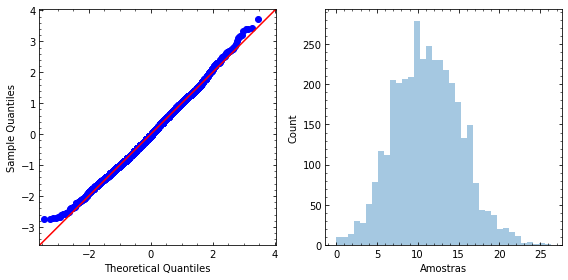

In [25]:
print('Teste Utilizado: Shapiro-Wilk')


def qqplot_fit(y, ax):
    """ Insira apenas um vetor de dados na função"""

    qqplot(y, dist=scipy.stats.distributions.norm, fit=True, line='45', ax=ax)
    ax.minorticks_on()
    ax.tick_params(axis='x', which="both",
                   direction='in', bottom=True, top=True)
    ax.tick_params(axis='y', which="both", direction='in',
                   bottom=False, top=False, right=True)


# Teste de Normalidade de Shapiro-Wilk
stat, p = shapiro(y)
alpha = 0.05
print('='*90)
if p > alpha:
    print('Segundo o teste de Shapiro-Wilk os dados aderem a uma distribuição Normal.')
    print('Valor calculado do teste de Shapiro-Wilk: {:.2f}'.format(stat))
    print('Valor-p: {:.2f}'.format(p))
else:
    print('Segundo o teste de Shapiro-Wilk os dados NÃO aderem a uma distribuição Normal.')
    print('Valor calculado do teste de Shapiro-Wilk: {:.2f}'.format(stat))
    print('Valor-p: {:.2f}'.format(p))
print('=' * 90)

# Plot dos gráficos
fig, (ax, ax1) = plt.subplots(figsize=[8, 4], ncols=2, tight_layout=True)
qqplot_fit(y, ax)
# plt.show()

# Distruibuição dos dados
sns.distplot(y, kde=False, kde_kws={
             'label': '{}'.format(test.name)}, hist=True)
ax1.minorticks_on()
ax1.set_xlabel('Amostras', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)
ax1.tick_params(axis='x', which="both", direction='in', bottom=True, top=True)
ax1.tick_params(axis='y', which="both", direction='in',
                bottom=False, top=False, right=True)
plt.show()